In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("restaurant.csv", encoding="latin-1")

In [4]:
df.sample(5)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
3154,2607489,baEkF9wJzPR7xnYrE2OHuQ,N4K69ZdyU-B8NzVYxwjK0A,RESDUcs7fIiihp38-d6_6g,5,14,12,14,"as most of you may know, i go back home (to ve...",2014-03-20 23:28:56
2238,2538336,-kapot7c_SPCzzx58rGdZA,zw_ox3-5TmApGzM_7GM_CQ,RESDUcs7fIiihp38-d6_6g,5,7,7,5,Let me start off by saying that I visited this...,2013-06-27 07:29:57
5648,2795785,_aQAS5fKi8EZRCEYXg0G3g,eeYHH97Ou1i8EID8rPV_kA,RESDUcs7fIiihp38-d6_6g,2,0,0,0,"Like the Patriots and Red Sox, this place is o...",2017-12-25 21:02:14
3356,2623206,RCY1WU3wX_oGmItb3stjzw,rAC8TQjmYXuPy-f3Z43azg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,Fast check in service :)\nBest all you can eat...,2013-09-14 18:16:09
7307,2933608,NeDxnRTM5ihnZDwoamo35A,y0miZ2NkdiTCdDsv2FwnDQ,RESDUcs7fIiihp38-d6_6g,4,1,0,1,Wow the choices the fun. I really enjoyed my m...,2016-07-01 01:03:17


In [5]:
df.shape

(10417, 10)

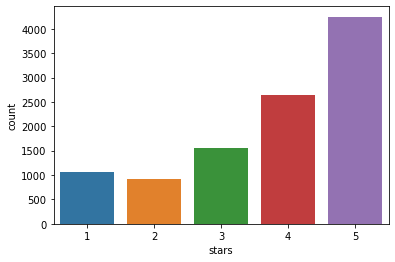

In [6]:
sns.countplot(x=df["stars"]);

In [7]:
df.date

0        2012-12-04 03:10:18
1        2014-01-17 00:50:50
2        2015-06-08 18:03:09
3        2016-12-19 16:15:29
4        2015-07-28 07:13:17
                ...         
10412    2019-11-17 20:39:36
10413    2019-11-12 02:23:07
10414    2019-12-12 03:27:22
10415    2019-11-01 21:00:51
10416    2019-11-30 22:36:56
Name: date, Length: 10417, dtype: object

In [8]:
df["Date"] = pd.to_datetime(df["date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Weekday"] = df["Date"].dt.dayofweek
df["WeekdayName"] = df["Date"].dt.day_name()
df["MonthName"] = df["Date"].dt.month_name()
df.drop(["Date"], axis = 1, inplace = True)
df.drop(["date"], axis =1, inplace =True)
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,Year,Month,Weekday,WeekdayName,MonthName
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012,12,1,Tuesday,December
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014,1,4,Friday,January
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015,6,0,Monday,June
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016,12,0,Monday,December
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015,7,1,Tuesday,July


In [9]:
yearbystar = pd.DataFrame(df.groupby("Year")["stars"].mean())

In [10]:
yearbystar

,stars
Year,
2012,3.899297
2013,3.930833
2014,3.809704
2015,3.870331
2016,3.613703
2017,3.685768
2018,3.714286
2019,3.807715


In [11]:
df.loc[df["stars"] < 3, "sentiment"] = "negative"
df.loc[df["stars"] == 3, "sentiment"] = "neutral"
df.loc[df["stars"] > 3, "sentiment"] = "positive"

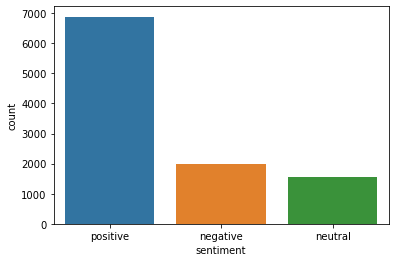

In [13]:
sns.countplot(x=df["sentiment"]);

In [14]:
df1=df[["sentiment","stars","text"]]

In [15]:
df1.head()

,sentiment,stars,text
0,positive,5,After getting food poisoning at the Palms hote...
1,positive,4,"""A feast worthy of Gods""\n\nBaccarnal Buffet i..."
2,positive,4,The crab legs are better than the ones at Wick...
3,negative,1,Not worth it! Too salty food and expensive! Th...
4,positive,5,I would give this infinite stars if I could. M...


In [16]:
df["text"]=df["text"].str.lower()
#küçük harfe çevrildi
df["text"]=df["text"].str.replace("[^\w\s]",'')
#noktalama kalktı
df["text"]=df["text"].str.replace("\d+", '')
#rakamlar kaldırıldı
df["text"]=df["text"].str.replace("\n", '').str.replace("\r", '')
#enter ve yeni satır kodları kaldırıldı

In [17]:
from langdetect import detect
df1['language'] = df1["text"].apply(detect)

In [18]:
df1.drop(index = df1[df1["language"] != "en"].index, inplace = True)

In [19]:
import nltk
from textblob import TextBlob

In [20]:
df1.head()

,sentiment,stars,text,language
0,positive,5,After getting food poisoning at the Palms hote...,en
1,positive,4,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",en
2,positive,4,The crab legs are better than the ones at Wick...,en
3,negative,1,Not worth it! Too salty food and expensive! Th...,en
4,positive,5,I would give this infinite stars if I could. M...,en


In [21]:
df1[["polarity", "subjectivity"]] = df1["text"].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [22]:
df1.head()

,sentiment,stars,text,language,polarity,subjectivity
0,positive,5,After getting food poisoning at the Palms hote...,en,0.371429,0.605702
1,positive,4,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",en,0.219409,0.537292
2,positive,4,The crab legs are better than the ones at Wick...,en,-0.134722,0.731944
3,negative,1,Not worth it! Too salty food and expensive! Th...,en,-0.484375,0.400000
4,positive,5,I would give this infinite stars if I could. M...,en,0.362500,0.725000


In [36]:
from wordcloud import STOPWORDS
from PIL import Image

In [45]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color = "white",
                  mask = mask,
                  max_words= 50000,
                  stopwords = stopwords)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("WordCloud saved")
    path = "wc.png"
    display(Image.open(path))

In [46]:
negWC = df1[df1["sentiment"]=="negative"]

In [47]:
import numpy as np

WordCloud saved


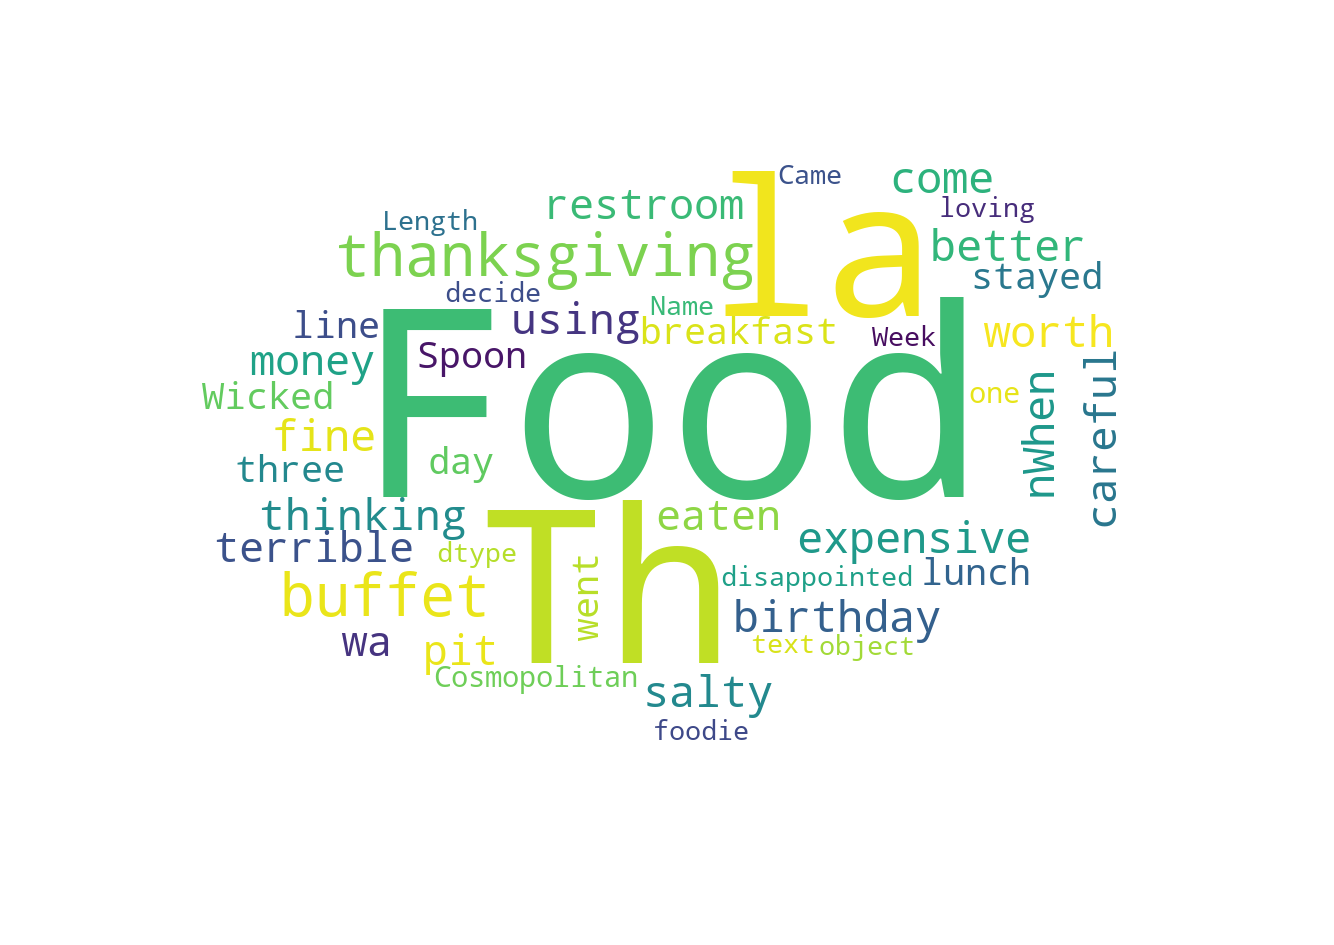

In [48]:
create_wordcloud(negWC.text)

In [49]:
posWC = df1[df1["sentiment"]=="positive"]

WordCloud saved


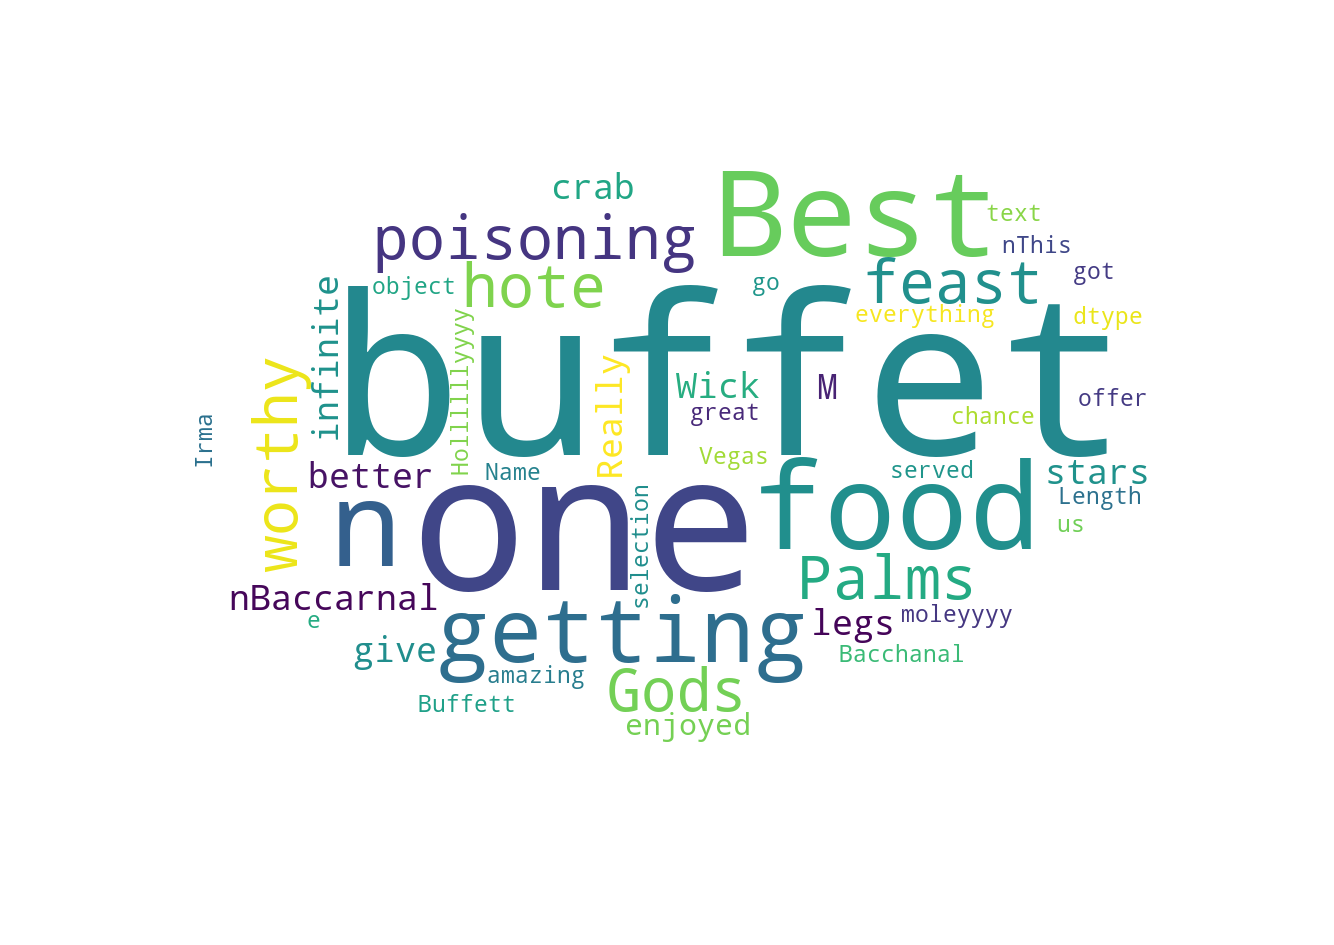

In [50]:
create_wordcloud(posWC.text)

In [51]:
x=df["text"]
y=df["stars"]

In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [53]:
vect=CountVectorizer(stop_words="english")

In [54]:
x=vect.fit_transform(x)

In [55]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=42,test_size=.15)

In [56]:
mb=MultinomialNB()

In [57]:
tahmin=mb.fit(x_train, y_train).predict(x_test)

In [58]:
accuracy_score(tahmin, y_test)

0.5585412667946257

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
d=DecisionTreeClassifier()

In [61]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [62]:
tahmin2=d.predict(x_test)

In [63]:
accuracy_score(y_test, tahmin2)

0.4248240563019834